# Challenge 3

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [36]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [37]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [38]:
list(titanic.select_dtypes(include='object').columns)

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

In [39]:
list(titanic.select_dtypes(exclude='object').columns)


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [40]:
plt.figure(figsize=(12, 6))
plt.style.use('classic');



<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

Text(0, 0.5, 'Frecuencia')

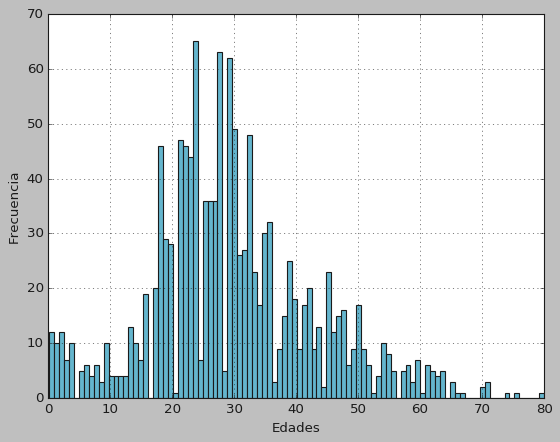

In [41]:
titanic['Age'].hist(bins=100, color='c');
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

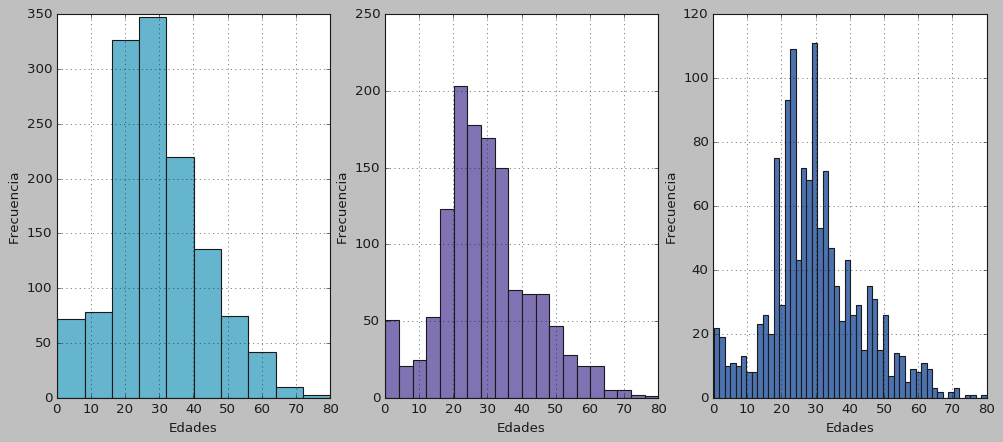

In [42]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
titanic['Age'].hist(bins=10, color='c');
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20, color='m');
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50, color='b');
plt.xlabel('Edades')
plt.ylabel('Frecuencia');

#### Whether the bin size affects your plot? Why?

El parámetro bin indica el número de subdivisiones o cajitas en las que quieres dividir tus datos, por tanto un tamaño grande de `bin`indicará más especificidad. Esro no implica que siempre queramos aplicar un número elevado. Dependerá del dato.

#### Use seaborn to show the distribution of the column `Age`

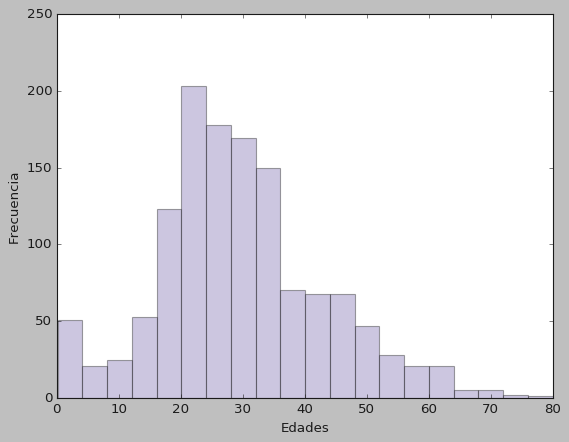

In [43]:
diagram = sns.distplot(titanic['Age'],bins=20,kde=False,color='m');
diagram.set(xlabel='Edades', ylabel='Frecuencia');

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

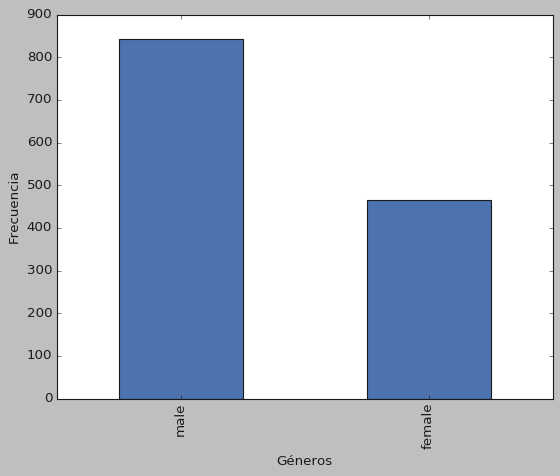

In [44]:
titanic['Gender'].value_counts().plot(kind='bar');
plt.xlabel('Géneros');
plt.ylabel('Frecuencia');

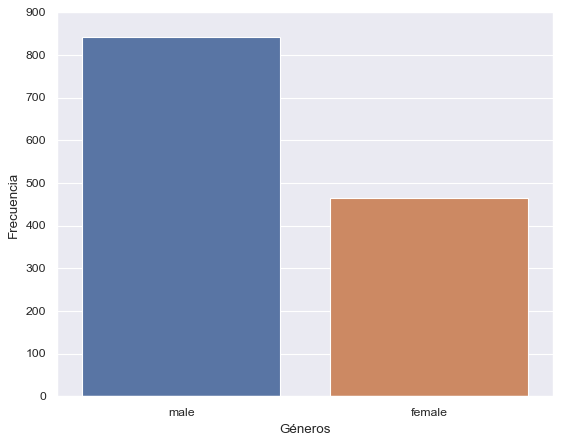

In [45]:
sns.set(style="darkgrid")
diagram = sns.countplot(titanic['Gender'])
diagram.set(xlabel='Géneros', ylabel='Frecuencia');

#### Use the appropriate plot to visualize the column `Pclass` 


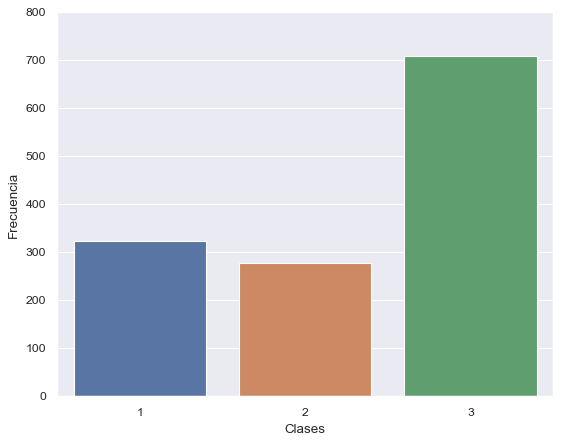

In [46]:
sns.set(style="darkgrid")
diagram = sns.countplot(titanic['Pclass'])
diagram.set(xlabel='Clases', ylabel='Frecuencia');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

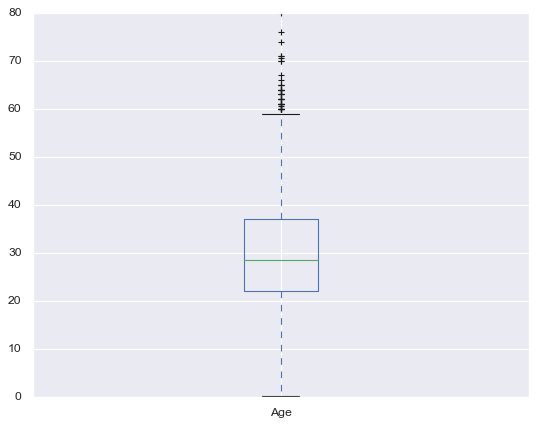

In [47]:
titanic.boxplot('Age');

#### What does the previous plot tell you about the feature `Age`? Comment.

En primer lugar, no es una distribución normal.  
Existen muchos outlayers en edades avanzadas. Pero la mediana está en torno a los 27, por lo tanto es una distribución desplazada a la izquierda.


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

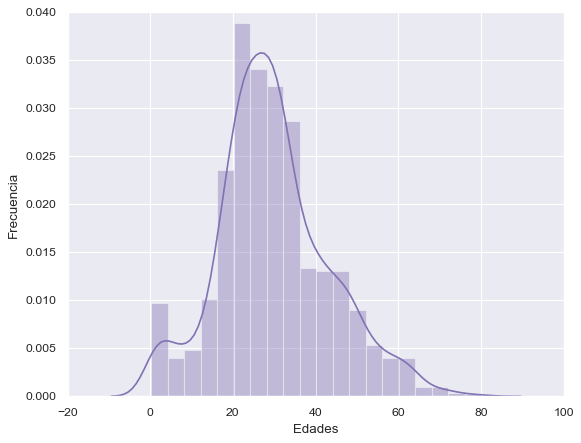

In [48]:
diagram = sns.distplot(titanic['Age'],bins=20,kde=True,color='m');
diagram.set(xlabel='Edades', ylabel='Frecuencia');

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Podemos observar que es una distribución multimodal. Podríamos decir que es bimodal porque vemos picos en torno a 4 años también. Pero si observamos con atención hay otros dos picos modales en torno a 50 años y a 62.


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

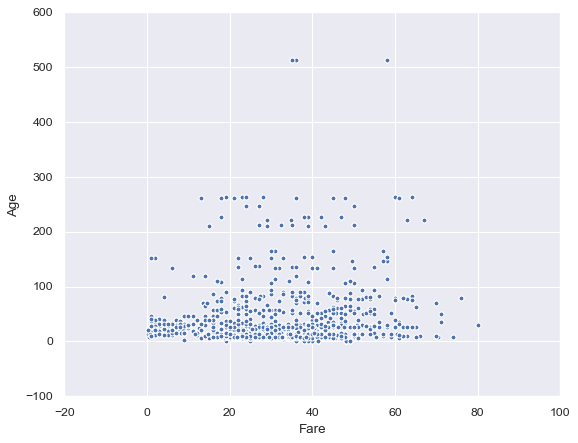

In [49]:
plt.scatter(titanic['Age'], titanic['Fare']);
plt.xlabel('Fare');
plt.ylabel('Age');

In [50]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

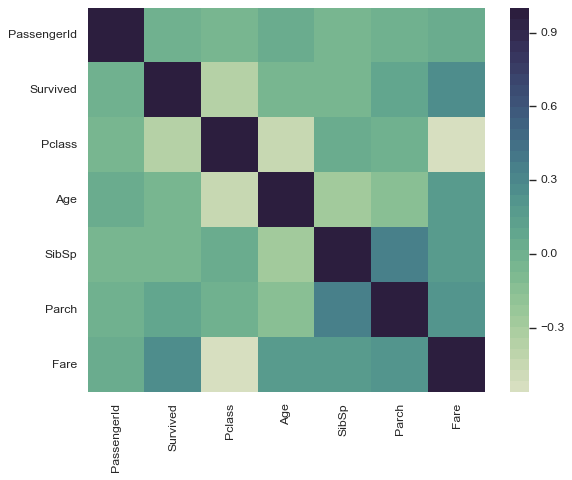

In [51]:
sns.heatmap(titanic.corr(),cmap=sns.cubehelix_palette(35, start=.5, rot=-.75));

#### According to the previous plot, what are the most correlated feature? Comment.

SibSp y Parch
Fare y Survived

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

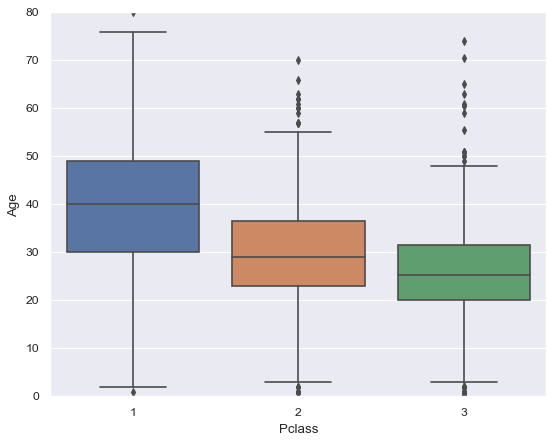

In [52]:
age_conditioned_to_class = sns.boxplot(titanic['Pclass'],titanic['Age']);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

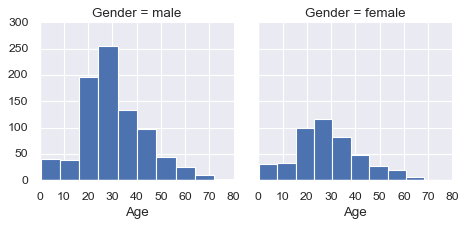

In [53]:
graphic = sns.FacetGrid(data=titanic, col='Gender')
graphic.map(plt.hist,'Age');